In [153]:
# download TA-Lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

--2024-05-13 03:44:26--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-05-13 03:44:26--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-05-13 03:44:26--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolvi

In [154]:
!ls

aclocal.m4	config.guess   configure.in  libtool	  missing		   ta-lib.dpkg
autogen.sh	config.log     depcomp	     ltmain.sh	  src			   ta-lib.dpkg.in
autom4te.cache	config.status  HISTORY.TXT   Makefile	  ta-lib-0.4.0-src.tar.gz  ta-lib.spec
bin		config.sub     include	     Makefile.am  ta-lib-config		   ta-lib.spec.in
CHANGELOG.TXT	configure      install-sh    Makefile.in  ta-lib-config.in


In [155]:
import os
!tar xvzf ta-lib-0.4.0-src.tar.gz

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [156]:
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!make install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [157]:
!ls

aclocal.m4	config.guess   configure.in  libtool	  missing	    ta-lib.dpkg.in
autogen.sh	config.log     depcomp	     ltmain.sh	  src		    ta-lib.spec
autom4te.cache	config.status  HISTORY.TXT   Makefile	  ta-lib-config     ta-lib.spec.in
bin		config.sub     include	     Makefile.am  ta-lib-config.in
CHANGELOG.TXT	configure      install-sh    Makefile.in  ta-lib.dpkg


In [158]:
!pip install TA-Lib

In [159]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import yfinance as yf
from sklearn.impute import KNNImputer
import talib
from sklearn.metrics import mean_squared_error


# Data Preprocessing


In [160]:
def preprocess_data():
  tickersymbol = '601318.SS'  # PingAn Insurance symbol on yf
  # data=yf.download('^GSPC', start='2012-01-01', end='2022-12-31')
  tickerData = yf.Ticker(tickersymbol)
  data = tickerData.history(period='1d', start='2010-1-4', end='2021-12-30')
  # data = data.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'])
  # filling null vlaues with knn
  # imputer = KNNImputer(n_neighbors=5)
  # data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)

  # Split the data into a training set (75%) and a prediction set (25%)
  # train_data, test_data = train_test_split(data, test_size=0.25, shuffle=False)
  # l=[train_data,test_data]
  return data

In [161]:
data=preprocess_data()
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00+08:00,20.259416,20.295926,19.653350,19.675255,58728024,0.0,0.0
2010-01-05 00:00:00+08:00,19.726368,20.153537,19.280947,19.923523,72031524,0.0,0.0
2010-01-06 00:00:00+08:00,19.861454,20.044004,19.459843,19.500004,66409204,0.0,0.0
2010-01-07 00:00:00+08:00,19.496359,19.646050,18.937754,19.138559,73083638,0.0,0.0
2010-01-08 00:00:00+08:00,19.138557,19.138557,18.729646,19.025377,64604364,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-23 00:00:00+08:00,45.140839,45.329716,44.745105,45.167824,40497888,0.0,0.0
2021-12-24 00:00:00+08:00,45.140844,45.149840,44.718129,44.808067,30775617,0.0,0.0
2021-12-27 00:00:00+08:00,44.933981,45.149838,44.853035,44.951969,27470106,0.0,0.0


# Feature Extraction


In [162]:
def feature_extract(train_data):
  train_data['pre_close'] = train_data['Close'].shift(1)
  train_data['change'] = train_data['Close'] - train_data['pre_close']
  train_data['amount'] = train_data['Volume'] * train_data['Close']
  train_data['upper_band'], train_data['middle_band'], train_data['lower_band'] = talib.BBANDS(train_data['Close'], timeperiod=5)
  train_data['10d_ma'] = talib.SMA(train_data['Close'], timeperiod=10)
  train_data['50d_ma'] = talib.SMA(train_data['Close'], timeperiod=50)
  train_data['DMA'] = train_data['10d_ma'] - train_data['50d_ma']
  train_data['ADX'] = talib.ADX(train_data['High'], train_data['Low'], train_data['Close'], timeperiod=14)
  train_data['EXPMA'] = talib.EMA(train_data['Close'], timeperiod=30)
  train_data['MA'] = talib.SMA(train_data['Close'], timeperiod=30)
  train_data['macd'], train_data['macdsignal'], train_data['macdhist'] = talib.MACD(train_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
  train_data['MTM'] = talib.MOM(train_data['Close'], timeperiod=10)
  train_data['ROC'] = talib.ROC(train_data['Close'], timeperiod=10)
  train_data['SAR'] = talib.SAR(train_data['High'], train_data['Low'], acceleration=0.02, maximum=0.2)
  train_data['TRIX'] = talib.TRIX(train_data['Close'], timeperiod=30)
  train_data['B3612'] = talib.BBANDS(train_data['Close'], timeperiod=36)[0] - talib.BBANDS(train_data['Close'], timeperiod=12)[0]
  train_data['CCI'] = talib.CCI(train_data['High'], train_data['Low'], train_data['Close'], timeperiod=14)
  slowk, slowd = talib.STOCH(train_data['High'], train_data['Low'], train_data['Close'], fastk_period=9, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  train_data['KDJ_K'] = slowk
  train_data['KDJ_D'] = slowd
  train_data['KDJ_J'] = 3*slowk - 2*slowd
  slowk, slowd = talib.STOCH(train_data['High'], train_data['Low'], train_data['Close'], fastk_period=9, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  train_data['SLOWKD_K'] = slowk
  train_data['SLOWKD_D'] = slowd
  train_data['ROC'] = talib.ROC(train_data['Close'], timeperiod=10)
  train_data['RSI'] = talib.RSI(train_data['Close'], timeperiod=14)
  train_data['RPS'] = talib.ROCP(train_data['Close'], timeperiod=14)
  train_data['SI'] = talib.SINH(train_data['Close'])
  train_data['SRDM'] = talib.SUM(talib.ROC(train_data['Close'], timeperiod=10), timeperiod=14)
  train_data['VROC'] = talib.ROC(train_data['Volume'], timeperiod=10)
  train_data['VRSI'] = talib.RSI(train_data['Volume'], timeperiod=14)
  train_data['WR'] = talib.WILLR(train_data['High'], train_data['Low'], train_data['Close'], timeperiod=14)
  train_data['CR'] = talib.ADOSC(train_data['High'], train_data['Low'], train_data['Close'], train_data['Volume'], fastperiod=3, slowperiod=10)
  up_days = train_data['Close'].diff(1) > 0
  PSY = up_days.rolling(window=12).mean() * 100
  train_data['PSY'] = PSY.fillna(50)
  train_data['CHO'] = talib.ADOSC(train_data['High'], train_data['Low'], train_data['Close'], train_data['Volume'], fastperiod=3, slowperiod=10)
  train_data['WAD'] = talib.WILLR(train_data['High'], train_data['Low'], train_data['Close'], timeperiod=14)
  train_data['MFI'] = talib.MFI(train_data['High'], train_data['Low'], train_data['Close'], train_data['Volume'], timeperiod=14)
  train_data['OBV'] = talib.OBV(train_data['Close'], train_data['Volume'])
  train_data['SOBV'] = talib.OBV(train_data['Close'], train_data['Volume'])
  train_data['WVAD'] = talib.ADOSC(train_data['High'], train_data['Low'], train_data['Close'], train_data['Volume'], fastperiod=3, slowperiod=10)
  upper, middle, lower = talib.BBANDS(train_data['Close'], timeperiod=5)
  train_data['BOLL_upper'] = upper
  train_data['BOLL_middle'] = middle
  train_data['BOLL_lower'] = lower
  train_data['CDP'] = talib.CCI(train_data['High'], train_data['Low'], train_data['Close'], timeperiod=14)
  train_data['TP'] = (train_data['High'] + train_data['Low'] + train_data['Close']) / 3
  train_data['SMA'] = train_data['TP'].rolling(window=20).mean()
  train_data['MIKE_WR'] = train_data['SMA'] + (train_data['High'].rolling(window=20).max() - train_data['Low'].rolling(window=20).min())
  train_data['MIKE_MR'] = train_data['SMA'] + 0.5 * (train_data['High'].rolling(window=20).max() - train_data['Low'].rolling(window=20).min())
  train_data['MIKE_SR'] = train_data['SMA'] - 0.5 * (train_data['High'].rolling(window=20).max() - train_data['Low'].rolling(window=20).min())
  train_data['MIKE_WS'] = train_data['SMA'] - (train_data['High'].rolling(window=20).max() - train_data['Low'].rolling(window=20).min())
  train_data['Quantityrelativeratio'] = train_data['Volume'].diff() / train_data['Volume'].shift(1)
  train_data['VMA'] = talib.MA(train_data['Volume'], timeperiod=6)
  _, _, train_data['VMACD'] = talib.MACD(train_data['Volume'])
  train_data['VOSC'] = talib.ULTOSC(train_data['High'], train_data['Low'], train_data['Close'])
  train_data['TAPI'] = (train_data['High'] + train_data['Low'] + train_data['Close']) / 3
  train_data['VSTD'] = talib.STDDEV(train_data['Volume'], timeperiod=6)
  train_data['ADTM'] = talib.ADOSC(train_data['High'], train_data['Low'], train_data['Close'], train_data['Volume'], fastperiod=3, slowperiod=10)
  high_low_diff = train_data['High'] - train_data['Low']
  ema_high_low_diff = talib.EMA(high_low_diff, timeperiod=9)
  train_data['MI'] = talib.EMA(ema_high_low_diff / talib.EMA(ema_high_low_diff, timeperiod=9), timeperiod=9)
  train_data['RC'] = train_data['Close'].pct_change()
  train_data['SRMI'] = train_data['Close'].rolling(window=20).mean()
  train_data['DPTB'] = train_data['High'] - train_data['Low']
  train_data['JDQS'] = train_data['High'] / train_data['Low']
  train_data['JDRS'] = train_data['High'] - train_data['Open']
  train_data['ZDZB'] = train_data['Close'] - train_data['Open']
  train_data['ATR'] = talib.ATR(train_data['High'], train_data['Low'], train_data['Close'], timeperiod=14)
  train_data['MASS'] = train_data['MI']
  train_data['STD'] = train_data['Close'].rolling(window=20).std()
  train_data['CVLT'] = talib.ATR(train_data['High'], train_data['Low'], train_data['Close'], timeperiod=10) / train_data['Close'] * 100
  train_data['Next_day'] = train_data['Close'].shift(-1)
  return train_data

In [163]:
train_data = feature_extract(data)
train_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
            ..
ATR         14
MASS        24
STD         19
CVLT        10
Next_day     1
Length: 77, dtype: int64

In [164]:
import pandas as pd
from sklearn.impute import KNNImputer

def clean_data(train_data):
  train_data = train_data.replace([np.inf, -np.inf], np.nan)
  transaction_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
  train_data = train_data.dropna(subset=transaction_cols, how='any')


  null_counts = train_data.drop(transaction_cols, axis=1).isnull().sum(axis=1)
  train_data = train_data[null_counts <= 3]
  #set count to 3 because too many rows were being dropped

  # Delete columns with more than 10 null values in technical indicators
  null_counts = train_data.drop(transaction_cols, axis=1).isnull().sum(axis=0)
  cols_to_drop = null_counts[null_counts > 10].index
  train_data = train_data.drop(cols_to_drop, axis=1)

  # Step 4: Fill remaining null values with KNN imputation
  imputer = KNNImputer()
  technical_cols = train_data.columns.drop(transaction_cols)
  train_data[technical_cols] = imputer.fit_transform(train_data[technical_cols])
  return train_data

In [165]:
train_data=clean_data(train_data)
scaler = MinMaxScaler()

# Apply the scaler to the entire DataFrame
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)


#PCA



In [166]:
from sklearn.decomposition import PCA

Explained variance ratios for components from 1 to 10:
Component 1 : 0.7293991423829616
Component 2 : 0.8787015387535511
Component 3 : 0.9019107585693646
Component 4 : 0.9193763266172962
Component 5 : 0.935605546288524
Component 6 : 0.9500861788383814
Component 7 : 0.9575941279299646
Component 8 : 0.9636564681663745
Component 9 : 0.9686497222699353
Component 10 : 0.9729698477833854


array([[-1.50372530e+00, -5.04469736e-01,  1.19689842e-01, ...,
         1.10241309e-19, -2.62020541e-17,  1.22111970e-15],
       [-1.50473481e+00, -4.50574723e-01,  2.33549397e-02, ...,
        -7.55214843e-17,  3.10808011e-16, -1.08655302e-16],
       [-1.50764472e+00, -3.92271912e-01, -5.42823558e-02, ...,
         5.76703021e-17, -1.26434719e-17,  2.29797956e-18],
       ...,
       [ 7.83251707e-01, -9.11640301e-01, -1.83460176e-02, ...,
        -6.20242665e-17,  2.49839160e-17,  1.53287435e-16],
       [ 8.00651763e-01, -3.67434184e-01, -6.06907067e-02, ...,
        -2.08454811e-17,  3.36294636e-18,  5.99781617e-17],
       [ 8.00792023e-01, -1.48082359e-01, -1.79244063e-01, ...,
        -7.33013446e-17,  1.68902463e-17, -7.75374360e-17]])

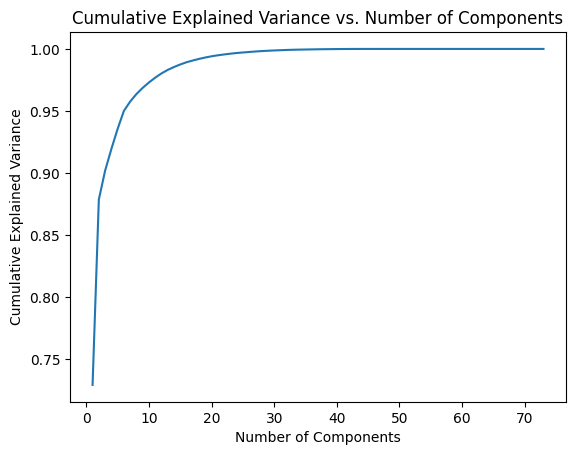

In [167]:
def func_pca(train_data_scaled):
  pca=PCA()
  X_pca = pca.fit_transform(train_data_scaled)
  # Calculate the cumulative explained variance
  cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
  cumulative_variance_ratios = list(pca.explained_variance_ratio_.cumsum())
  num_components = len(cumulative_variance_ratios)

  # Plot the cumulative explained variance
  plt.plot(range(1, num_components+1), cumulative_variance_ratios)
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.title('Cumulative Explained Variance vs. Number of Components')
  print("Explained variance ratios for components from 1 to 10:")
  for i in range(10):
      print("Component", i+1, ":", cumulative_variance_ratios[i])

  return X_pca

func_pca(train_data_scaled)

In [168]:
num=6
pca = PCA(n_components=num)
x_pca = pca.fit_transform(train_data_scaled)

components=pca.components_
principal_components = pca.components_

# Access the explained variance of each principal component
explained_variances = pca.explained_variance_ratio_
features = train_data.columns[:-1]
# Print the explained variance of each principal component
for i, explained_variance in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {explained_variance:.4f}")

# Print the loadings of the original features on each principal component
for i, pc in enumerate(principal_components):
    print(f"Principal Component {i+1} Loadings:")
    for feature, loading in zip(features, pc):
        print(f"{feature}: {loading:.4f}")

Principal Component 1: 0.7294
Principal Component 2: 0.1493
Principal Component 3: 0.0232
Principal Component 4: 0.0175
Principal Component 5: 0.0162
Principal Component 6: 0.0145
Principal Component 1 Loadings:
Open: 0.1876
High: 0.1871
Low: 0.1884
Close: 0.1876
Volume: 0.0010
Dividends: 0.0012
Stock Splits: -0.0000
pre_close: 0.1877
change: -0.0004
amount: 0.0167
upper_band: 0.1907
middle_band: 0.1909
lower_band: 0.1902
10d_ma: 0.1950
ADX: -0.0013
EXPMA: 0.2059
MA: 0.2035
macd: 0.0051
macdsignal: 0.0070
macdhist: -0.0026
MTM: 0.0005
ROC: -0.0002
SAR: 0.1843
B3612: 0.0164
CCI: -0.0007
KDJ_K: 0.0002
KDJ_D: 0.0010
KDJ_J: -0.0005
SLOWKD_K: 0.0002
SLOWKD_D: 0.0010
RSI: -0.0002
RPS: 0.0002
SI: 0.0013
SRDM: 0.0017
VROC: -0.0021
VRSI: 0.0009
WR: -0.0044
CR: -0.0015
PSY: 0.0023
CHO: -0.0015
WAD: -0.0044
MFI: -0.0014
OBV: 0.2122
SOBV: 0.2122
WVAD: -0.0015
BOLL_upper: 0.1907
BOLL_middle: 0.1909
BOLL_lower: 0.1902
CDP: -0.0007
TP: 0.1888
SMA: 0.1999
MIKE_WR: 0.1917
MIKE_MR: 0.1969
MIKE_SR: 0.196

In [169]:
x_pca_df = pd.DataFrame(x_pca)
x_pca_df

,0,1,2,3,4,5
0,-1.503725,-0.504470,0.119690,0.314687,-0.041118,0.337934
1,-1.504735,-0.450575,0.023355,0.199761,-0.156452,0.211918
2,-1.507645,-0.392272,-0.054282,0.120681,-0.242103,0.171958
3,-1.509950,-0.652978,0.032230,-0.011936,-0.378660,0.081063
4,-1.516297,-0.597016,-0.023551,0.079761,-0.276231,0.123282
...,...,...,...,...,...,...
2874,0.791287,-0.611449,-0.006280,0.136817,0.331098,-0.281665
2875,0.783329,-0.878273,0.009062,0.089429,0.290648,-0.361362
2876,0.783252,-0.911640,-0.018346,0.051525,0.277319,-0.348531
2877,0.800652,-0.367434,-0.060691,0.185602,0.415728,-0.086897


#LSTM on PingAn Insurance


In [170]:
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
def create_lstm_model(input_shape):
    lstm_model = Sequential()
    lstm_model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    lstm_model.add(LSTM(64, return_sequences=False))
    lstm_model.add(Dense(25))
    lstm_model.add(Dense(1))
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    return lstm_model
# Set the number of days

num_days = 12

# Define columns to be excluded
columns_to_exclude = ['dividends', 'stock_splits', 'next_day']

# Filter out excluded columns from all columns
features = [column for column in train_data.columns if column not in columns_to_exclude]

# Target column list
target = ['next_day']

# Prepare the sequences
X_seq = []
y_seq = []
for idx in range(len(x_pca) - num_days):
    X_seq.append(x_pca[idx:idx+num_days])
    y_seq.append(train_data['Next_day'].values[idx+num_days])

# Convert to numpy arrays
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Scale the input sequences (X)
scaler_X = MinMaxScaler()
X_seq = scaler_X.fit_transform(X_seq.reshape(X_seq.shape[0], -1))

# Scale the target variable (y)
scaler_y = MinMaxScaler()
y_seq = scaler_y.fit_transform(y_seq.reshape(-1, 1))

# Create a TimeSeriesSplit object
time_series_split = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=200)

for train_idx, test_idx in time_series_split.split(X_seq, y_seq):
    X_seq_train, X_seq_test = X_seq[train_idx], X_seq[test_idx]
    y_seq_train, y_seq_test = y_seq[train_idx], y_seq[test_idx]
    train_index, test_index = train_idx, test_idx

X_seq_train = X_seq_train.reshape((X_seq_train.shape[0], num_days, -1))
X_seq_test = X_seq_test.reshape((X_seq_test.shape[0], num_days, -1))

print(X_seq_train.shape, X_seq_test.shape)
print(y_seq_train.shape, y_seq_test.shape)

date_df= train_data.reset_index()

date_values_bi = date_df['Date'].iloc[test_index].values



input_shape = (X_seq_train.shape[1], X_seq_train.shape[2])
lstm_model = create_lstm_model(input_shape)

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min')

history = lstm_model.fit(X_seq_train, y_seq_train, epochs=50, batch_size=32,
                    validation_data=(X_seq_test, y_seq_test), callbacks=[early_stop])

predictions = lstm_model.predict(X_seq_test)



(2667, 12, 6) (200, 12, 6)
(2667, 1) (200, 1)
Epoch 1/50
84/84 [==============================] - 9s 53ms/step - loss: 0.0077 - val_loss: 8.4117e-04
Epoch 2/50
84/84 [==============================] - 4s 50ms/step - loss: 5.3646e-04 - val_loss: 5.2099e-04
Epoch 3/50
84/84 [==============================] - 6s 70ms/step - loss: 5.1664e-04 - val_loss: 4.5383e-04
Epoch 4/50
84/84 [==============================] - 4s 48ms/step - loss: 5.3698e-04 - val_loss: 3.9302e-04
Epoch 5/50
84/84 [==============================] - 5s 54ms/step - loss: 4.8008e-04 - val_loss: 5.0950e-04
Epoch 6/50
84/84 [==============================] - 5s 65ms/step - loss: 5.1434e-04 - val_loss: 3.8206e-04
Epoch 7/50
84/84 [==============================] - 4s 53ms/step - loss: 4.2045e-04 - val_loss: 0.0013
Epoch 8/50
84/84 [==============================] - 5s 55ms/step - loss: 4.5892e-04 - val_loss: 6.3921e-04
Epoch 9/50
84/84 [==============================] - 5s 56ms/step - loss: 4.6664e-04 - val_loss: 4.0526e-04

7/7 [==============================] - 0s 8ms/step


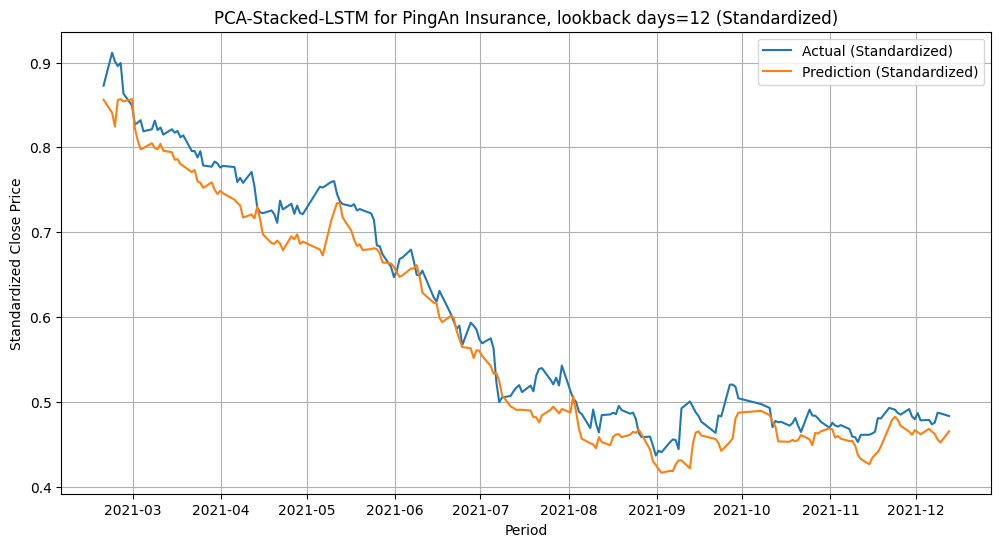

In [171]:
# Predictions without inverse transformation
predictions = lstm_model.predict(X_seq_test)

plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM for PingAn Insurance, lookback days=12 (Standardized)')
plt.ylabel('Standardized Close Price')
plt.xlabel('Period')
plt.plot(date_values_bi, y_seq_test, label='Actual (Standardized)')
plt.plot(date_values_bi, predictions, label='Prediction (Standardized)')
plt.grid()
plt.legend(loc='best')

plt.show()


Mean Squared Error (MSE): 4.233872828429582


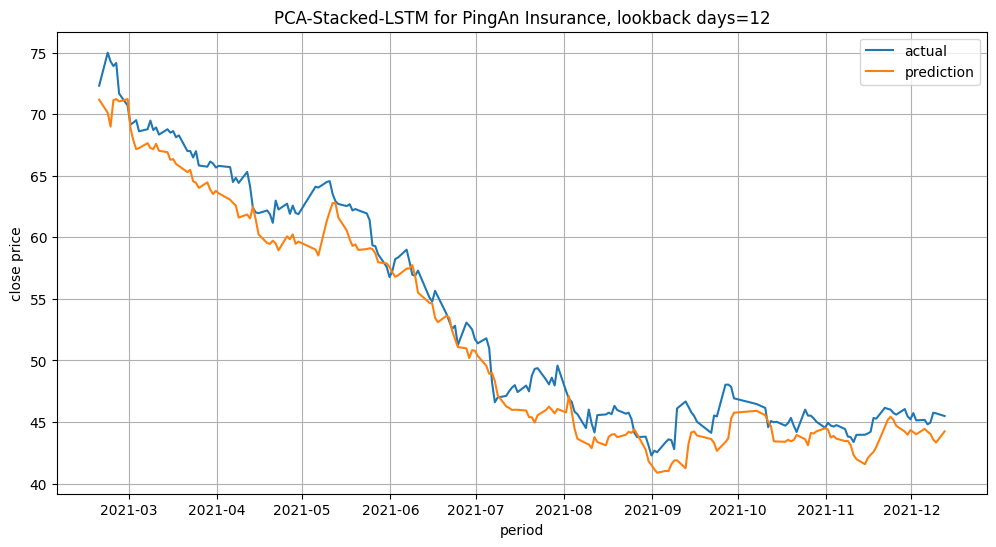

In [172]:
#Real values of prediction
y_pred = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(y_seq_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error (MSE):", mse)
plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM for PingAn Insurance, lookback days=12')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(date_values_bi, y_test, label='actual')
plt.plot(date_values_bi, y_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

# GSPC Stock


In [173]:
def preprocess_data():
  data=yf.download('^GSPC', start='2012-01-01', end='2022-12-31')
  return data

data=preprocess_data()

[*********************100%%**********************]  1 of 1 completed


In [174]:
train_data = feature_extract(data)
train_data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
             ..
ATR          14
MASS         24
STD          19
CVLT         10
Next_day      1
Length: 76, dtype: int64

Explained variance ratios for components from 1 to 10:
Component 1 : 0.6427595261205185
Component 2 : 0.8660688368363678
Component 3 : 0.8944640404761639
Component 4 : 0.9120351553570156
Component 5 : 0.9271069220220247
Component 6 : 0.9396142980819169
Component 7 : 0.9504208457368261
Component 8 : 0.9589999664525302
Component 9 : 0.9663172194753511
Component 10 : 0.9707348733900802


array([[-1.95227618e+00, -7.29662273e-01,  2.84035797e-01, ...,
        -2.95614509e-17,  2.34676947e-15,  6.23011892e-15],
       [-1.94854186e+00, -9.40794361e-01,  3.18039274e-01, ...,
         1.00192305e-16, -8.21336474e-17, -9.06397448e-18],
       [-1.93360930e+00, -9.49457855e-01,  3.08485748e-01, ...,
         1.45904811e-16,  1.25884058e-17, -1.12654040e-16],
       ...,
       [ 1.87754052e+00,  1.25077228e+00, -1.89425686e-01, ...,
         7.28015339e-17, -2.52600446e-16,  8.36431189e-17],
       [ 1.87431650e+00,  8.71833839e-01, -5.72468171e-02, ...,
         1.07624856e-16, -1.53014600e-16,  1.17692364e-16],
       [ 1.83646867e+00,  6.96320494e-01, -9.69194021e-02, ...,
        -3.30987520e-17, -2.18820027e-16,  1.07367923e-16]])

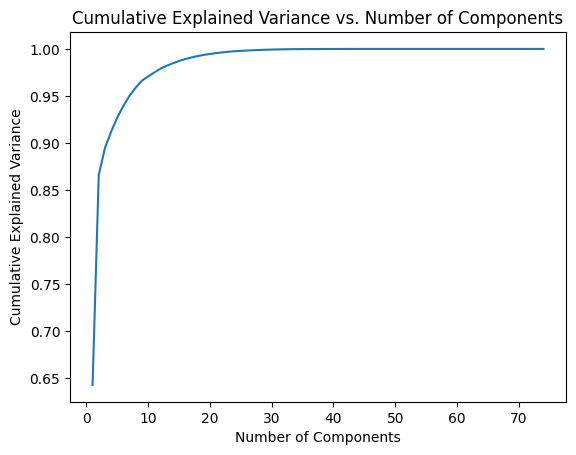

In [175]:
train_data=clean_data(train_data)
scaler = MinMaxScaler()
# Apply the scaler to the entire DataFrame
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)
func_pca(train_data_scaled)

In [176]:
num=6
pca = PCA(n_components=num)
x_pca = pca.fit_transform(train_data_scaled)

components=pca.components_
principal_components = pca.components_

# Access the explained variance of each principal component
explained_variances = pca.explained_variance_ratio_
features = train_data.columns[:-1]
# Print the explained variance of each principal component
for i, explained_variance in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {explained_variance:.4f}")

# # Print the loadings of the original features on each principal component
# for i, pc in enumerate(principal_components):
#     print(f"Principal Component {i+1} Loadings:")
#     for feature, loading in zip(features, pc):
#         print(f"{feature}: {loading:.4f}")

x_pca_df = pd.DataFrame(x_pca)


days=12
# Define columns to exclude
exclude_columns = ['dividends', 'stock_splits', 'next_day']

# Filter out excluded columns from all columns
train_columns = [col for col in train_data.columns if col not in exclude_columns]

# Target column list
target_columns = ['next_day']
X_p = []
y_p = []
for i in range(len(x_pca) - days):
    X_p.append(x_pca[i:i+days])
    y_p.append(train_data['Next_day'].values[i+days])

# Convert to numpy arrays
X_p = np.array(X_p)
y_p = np.array(y_p)

# Scale the input sequences (X)
scaler = MinMaxScaler()
X_p = scaler.fit_transform(X_p.reshape(X_p.shape[0], -1))

# Scale the target variable (y)
y_scaler = MinMaxScaler()
y_p = y_scaler.fit_transform(y_p.reshape(-1, 1))

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=200)
for train_index, test_index in tscv.split(X_p, y_p):
    X_p_train, X_p_test = X_p[train_index], X_p[test_index]
    y_p_train, y_p_test = y_p[train_index], y_p[test_index]

X_p_train = X_p_train.reshape((X_p_train.shape[0], days, -1))
X_p_test = X_p_test.reshape((X_p_test.shape[0], days, -1))

print(X_p_train.shape, X_p_test.shape)
print(y_p_train.shape, y_p_test.shape)

Principal Component 1: 0.6428
Principal Component 2: 0.2233
Principal Component 3: 0.0284
Principal Component 4: 0.0176
Principal Component 5: 0.0151
Principal Component 6: 0.0125
(2507, 12, 6) (200, 12, 6)
(2507, 1) (200, 1)


# LSTM on GSPC stock


In [177]:
num_days = 12

# Define columns to be excluded
columns_to_exclude = ['dividends', 'stock_splits', 'next_day']

# Filter out excluded columns from all columns
features = [column for column in train_data.columns if column not in columns_to_exclude]

# Target column list
target = ['next_day']

# Prepare the sequences
X_seq = []
y_seq = []
for idx in range(len(x_pca) - num_days):
    X_seq.append(x_pca[idx:idx+num_days])
    y_seq.append(train_data['Next_day'].values[idx+num_days])

# Convert to numpy arrays
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Scale the input sequences (X)
scaler_X = MinMaxScaler()
X_seq = scaler_X.fit_transform(X_seq.reshape(X_seq.shape[0], -1))

# Scale the target variable (y)
scaler_y = MinMaxScaler()
y_seq = scaler_y.fit_transform(y_seq.reshape(-1, 1))

# Create a TimeSeriesSplit object
time_series_split = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=200)

for train_idx, test_idx in time_series_split.split(X_seq, y_seq):
    X_seq_train, X_seq_test = X_seq[train_idx], X_seq[test_idx]
    y_seq_train, y_seq_test = y_seq[train_idx], y_seq[test_idx]
    train_index, test_index = train_idx, test_idx

X_seq_train = X_seq_train.reshape((X_seq_train.shape[0], num_days, -1))
X_seq_test = X_seq_test.reshape((X_seq_test.shape[0], num_days, -1))

print(X_seq_train.shape, X_seq_test.shape)
print(y_seq_train.shape, y_seq_test.shape)

date_df= train_data.reset_index()

date_values_bi = date_df['Date'].iloc[test_index].values



input_shape = (X_seq_train.shape[1], X_seq_train.shape[2])
lstm_model = create_lstm_model(input_shape)

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min')

history = lstm_model.fit(X_seq_train, y_seq_train, epochs=50, batch_size=32,
                    validation_data=(X_seq_test, y_seq_test), callbacks=[early_stop])

predictions = lstm_model.predict(X_seq_test)



(2507, 12, 6) (200, 12, 6)
(2507, 1) (200, 1)
Epoch 1/50
79/79 [==============================] - 11s 76ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 2/50
79/79 [==============================] - 4s 49ms/step - loss: 3.4444e-04 - val_loss: 0.0013
Epoch 3/50
79/79 [==============================] - 5s 64ms/step - loss: 2.9484e-04 - val_loss: 0.0012
Epoch 4/50
79/79 [==============================] - 5s 69ms/step - loss: 2.5126e-04 - val_loss: 0.0010
Epoch 5/50
79/79 [==============================] - 4s 55ms/step - loss: 2.7274e-04 - val_loss: 0.0011
Epoch 6/50
79/79 [==============================] - 5s 62ms/step - loss: 2.2861e-04 - val_loss: 9.7223e-04
Epoch 7/50
79/79 [==============================] - 5s 63ms/step - loss: 2.3287e-04 - val_loss: 0.0013
Epoch 8/50
79/79 [==============================] - 4s 52ms/step - loss: 2.1465e-04 - val_loss: 0.0012
Epoch 9/50
79/79 [==============================] - 2s 25ms/step - loss: 2.4223e-04 - val_loss: 0.0010
Epoch 10/50
79/79 [=======

7/7 [==============================] - 0s 8ms/step


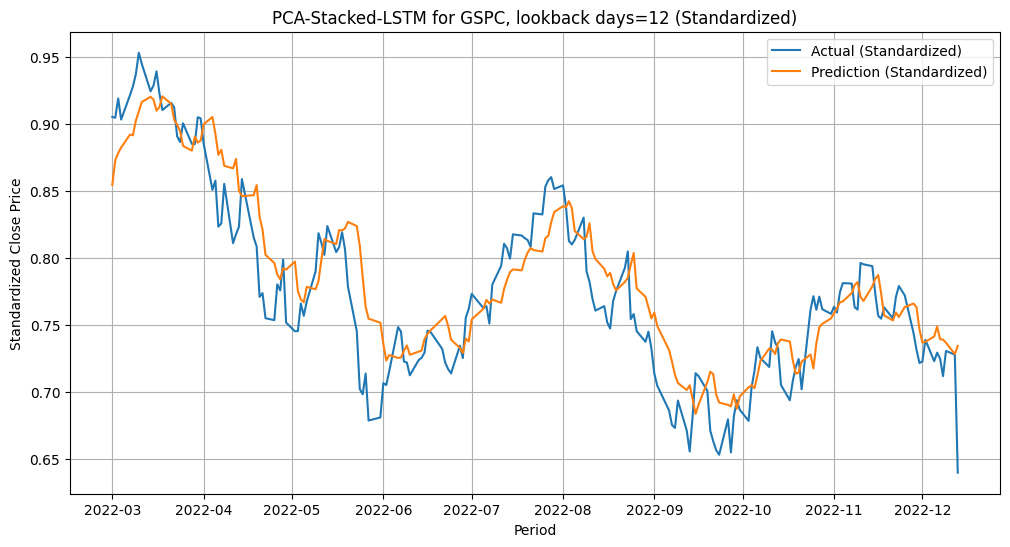

In [178]:
# Predictions without inverse transformation
predictions = lstm_model.predict(X_seq_test)

plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM for GSPC, lookback days=12 (Standardized)')
plt.ylabel('Standardized Close Price')
plt.xlabel('Period')
plt.plot(date_values_bi, y_seq_test, label='Actual (Standardized)')
plt.plot(date_values_bi, predictions, label='Prediction (Standardized)')
plt.grid()
plt.legend(loc='best')

plt.show()


Mean Squared Error (MSE): 11334.241702028809


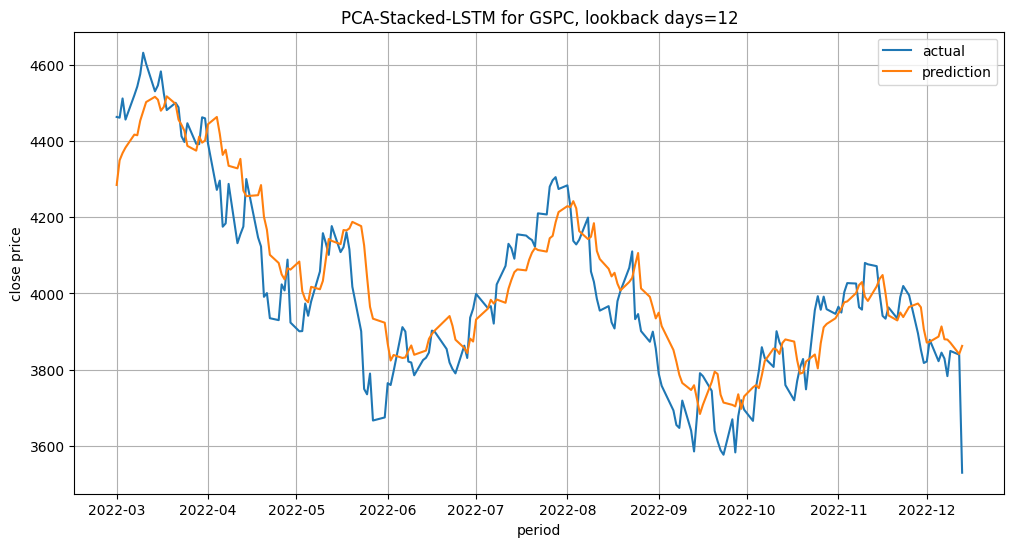

In [179]:
#Real values of prediction
y_pred = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(y_seq_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error (MSE):", mse)
plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM for GSPC, lookback days=12')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(date_values_bi, y_test, label='actual')
plt.plot(date_values_bi, y_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

# AAPL Stock


In [180]:
def preprocess_data():
  data=yf.download('AAPL', start='2012-01-01', end='2022-12-31')
  return data

data=preprocess_data()
train_data = feature_extract(data)
train_data.isnull().sum()


[*********************100%%**********************]  1 of 1 completed


Open          0
High          0
Low           0
Close         0
Adj Close     0
             ..
ATR          14
MASS         24
STD          19
CVLT         10
Next_day      1
Length: 76, dtype: int64

Explained variance ratios for components from 1 to 10:
Component 1 : 0.6609329047846804
Component 2 : 0.8648106283827215
Component 3 : 0.8887946182378569
Component 4 : 0.908230813099938
Component 5 : 0.921265672021466
Component 6 : 0.9323099806133247
Component 7 : 0.9417437386877004
Component 8 : 0.9497372666563165
Component 9 : 0.9572411694320022
Component 10 : 0.9631275263930618


array([[-1.31822336e+00, -7.32007960e-01,  1.13398914e+00, ...,
        -3.26306863e-18,  3.12038358e-17,  6.96371407e-15],
       [-1.28928694e+00, -9.00637511e-01,  7.55044146e-01, ...,
        -4.04091497e-17, -1.82893527e-16, -2.65038404e-16],
       [-1.27078403e+00, -1.07515189e+00,  7.37472558e-01, ...,
         1.57885494e-16,  1.53957708e-16, -1.47396212e-16],
       ...,
       [ 2.40523427e+00,  1.58923011e+00, -2.24284025e-01, ...,
        -3.52476256e-17,  1.67815948e-17,  3.75012978e-18],
       [ 2.38022405e+00,  1.31920718e+00, -2.78029722e-01, ...,
        -2.60391341e-17, -9.97976145e-17, -7.79193549e-17],
       [ 2.35758975e+00,  1.16465625e+00, -3.28019011e-01, ...,
        -5.43788375e-19,  3.43158499e-17, -7.61492047e-17]])

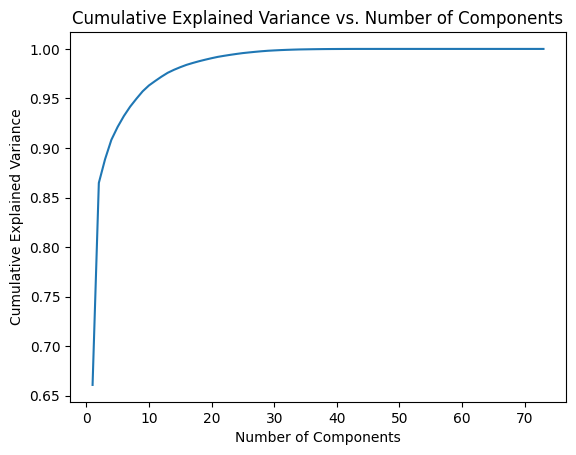

In [181]:
train_data=clean_data(train_data)
scaler = MinMaxScaler()
# Apply the scaler to the entire DataFrame
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)
func_pca(train_data_scaled)


# LSTM on AAPL stock


In [182]:
num=6
pca = PCA(n_components=num)
x_pca = pca.fit_transform(train_data_scaled)

components=pca.components_
principal_components = pca.components_

# Access the explained variance of each principal component
explained_variances = pca.explained_variance_ratio_
features = train_data.columns[:-1]
# Print the explained variance of each principal component
for i, explained_variance in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {explained_variance:.4f}")

x_pca_df = pd.DataFrame(x_pca)


num_days = 12

# Define columns to be excluded
columns_to_exclude = ['dividends', 'stock_splits', 'next_day']

# Filter out excluded columns from all columns
features = [column for column in train_data.columns if column not in columns_to_exclude]

# Target column list
target = ['next_day']

# Prepare the sequences
X_seq = []
y_seq = []
for idx in range(len(x_pca) - num_days):
    X_seq.append(x_pca[idx:idx+num_days])
    y_seq.append(train_data['Next_day'].values[idx+num_days])

# Convert to numpy arrays
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Scale the input sequences (X)
scaler_X = MinMaxScaler()
X_seq = scaler_X.fit_transform(X_seq.reshape(X_seq.shape[0], -1))

# Scale the target variable (y)
scaler_y = MinMaxScaler()
y_seq = scaler_y.fit_transform(y_seq.reshape(-1, 1))

# Create a TimeSeriesSplit object
time_series_split = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=200)

for train_idx, test_idx in time_series_split.split(X_seq, y_seq):
    X_seq_train, X_seq_test = X_seq[train_idx], X_seq[test_idx]
    y_seq_train, y_seq_test = y_seq[train_idx], y_seq[test_idx]
    train_index, test_index = train_idx, test_idx

X_seq_train = X_seq_train.reshape((X_seq_train.shape[0], num_days, -1))
X_seq_test = X_seq_test.reshape((X_seq_test.shape[0], num_days, -1))

print(X_seq_train.shape, X_seq_test.shape)
print(y_seq_train.shape, y_seq_test.shape)

date_df= train_data.reset_index()

date_values_bi = date_df['Date'].iloc[test_index].values



input_shape = (X_seq_train.shape[1], X_seq_train.shape[2])
lstm_model = create_lstm_model(input_shape)

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min')

history = lstm_model.fit(X_seq_train, y_seq_train, epochs=50, batch_size=32,
                    validation_data=(X_seq_test, y_seq_test), callbacks=[early_stop])

# predictions = lstm_model.predict(X_seq_test)



Principal Component 1: 0.6609
Principal Component 2: 0.2039
Principal Component 3: 0.0240
Principal Component 4: 0.0194
Principal Component 5: 0.0130
Principal Component 6: 0.0110
(2521, 12, 6) (200, 12, 6)
(2521, 1) (200, 1)
Epoch 1/50
79/79 [==============================] - 8s 38ms/step - loss: 0.0075 - val_loss: 0.0018
Epoch 2/50
79/79 [==============================] - 2s 24ms/step - loss: 3.2248e-04 - val_loss: 0.0027
Epoch 3/50
79/79 [==============================] - 2s 24ms/step - loss: 2.7948e-04 - val_loss: 0.0015
Epoch 4/50
79/79 [==============================] - 2s 24ms/step - loss: 2.5143e-04 - val_loss: 0.0013
Epoch 5/50
79/79 [==============================] - 2s 24ms/step - loss: 2.7506e-04 - val_loss: 0.0012
Epoch 6/50
79/79 [==============================] - 3s 43ms/step - loss: 2.6275e-04 - val_loss: 0.0025
Epoch 7/50
79/79 [==============================] - 2s 26ms/step - loss: 2.7567e-04 - val_loss: 0.0018
Epoch 8/50
79/79 [==============================] - 2s 24

7/7 [==============================] - 1s 11ms/step


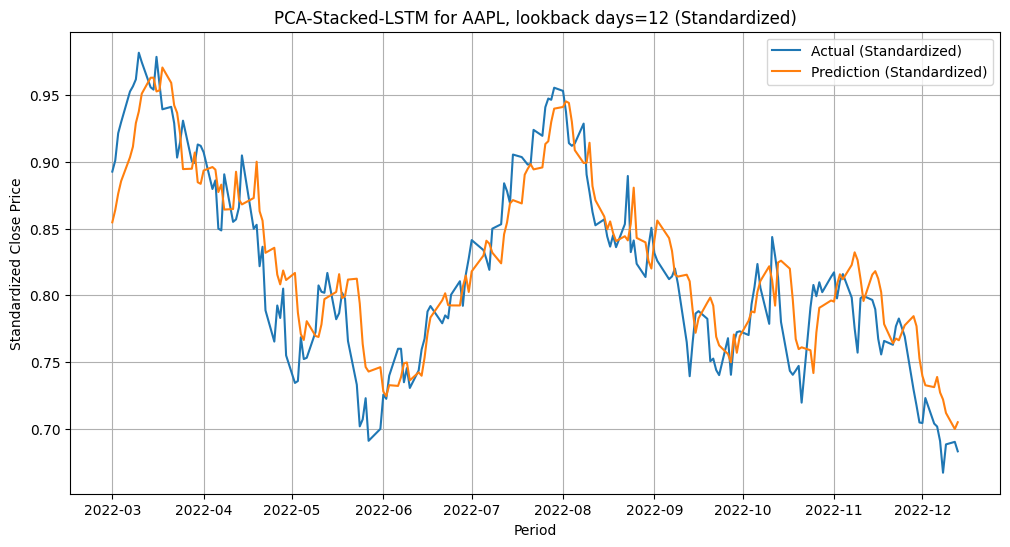

In [183]:
# Predictions without inverse transformation
predictions = lstm_model.predict(X_seq_test)

plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM for AAPL, lookback days=12 (Standardized)')
plt.ylabel('Standardized Close Price')
plt.xlabel('Period')
plt.plot(date_values_bi, y_seq_test, label='Actual (Standardized)')
plt.plot(date_values_bi, predictions, label='Prediction (Standardized)')
plt.grid()
plt.legend(loc='best')

plt.show()


Mean Squared Error (MSE): 26.16369617853372


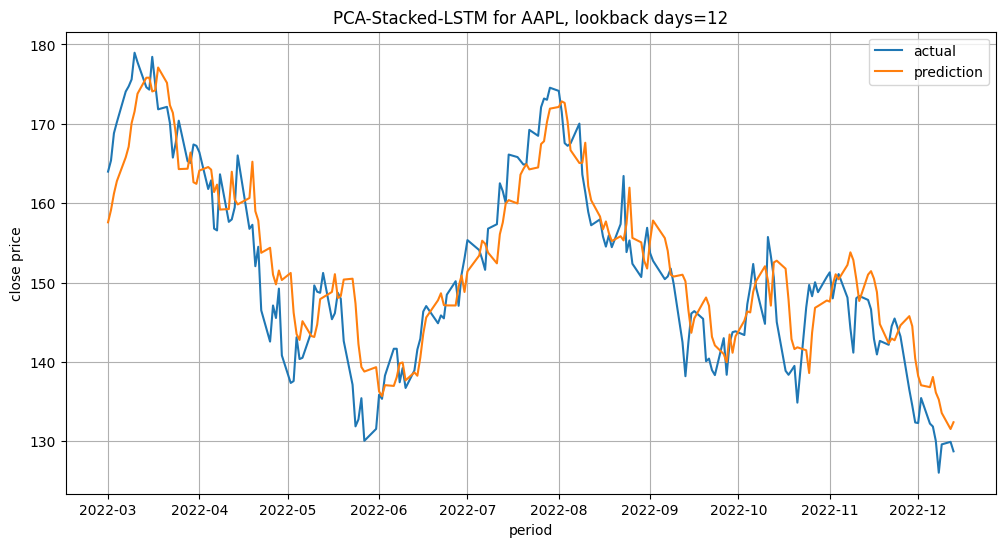

In [184]:
#Real values of prediction
y_pred = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(y_seq_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error (MSE):", mse)
plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM for AAPL, lookback days=12')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(date_values_bi, y_test, label='actual')
plt.plot(date_values_bi, y_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()